In [9]:
import sys
sys.path.append('/home/hcleroy/Extra_Module_py/')
import formated_matplotlib
import tables as pt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set figure size in inches
mpl.rcParams['figure.figsize'] = [5.91, 3.94]

# Set text font
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams['font.family'] = 'Ubuntu'

# Use LaTeX for text rendering
mpl.rcParams['text.usetex'] = False

# Set font size in points
mpl.rcParams['font.size'] = 28.35

# For removing minor ticks when x axis is in log scale
from matplotlib.ticker import NullLocator
import matplotlib.pyplot as plt
import matplotlib.cm as cm


sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
from ToolBox import *


In [17]:
step_tot = 2*10**5
compute_steps = 10000
bins = 30
Nprocess = 100
print(step_tot//compute_steps)

20


In [7]:
g = np.zeros((step_tot//compute_steps,bins,2),dtype=float)
time = np.zeros(step_tot//compute_steps,dtype=float)
with pt.open_file('G_20linker_Ls100V.hdf','r') as file:
    for group in file.walk_nodes('/',classname='Group'):
        for step in range(step_tot//compute_steps):
            try:
                array = file.get_node(group._v_pathname+'/step_'+str(step))
            except pt.NoSuchNodeError:
                continue
            g[step]+=array.read()/Nprocess
            time[step] +=array.attrs['time']/Nprocess

/tmp/ipykernel_102510/4095050753.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


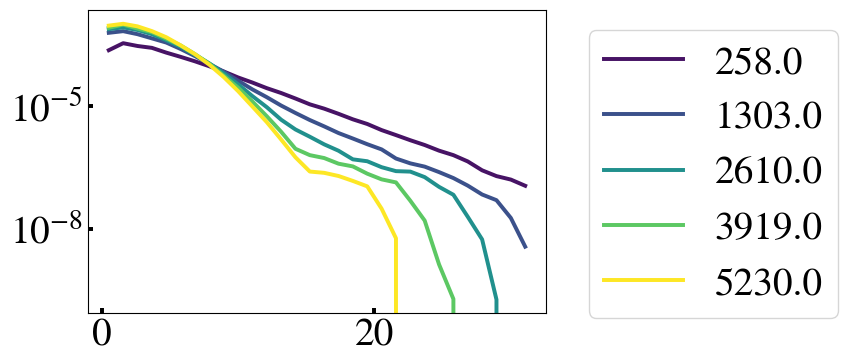

In [24]:
fig, ax = plt.subplots()
cmap = cm.get_cmap('viridis')
indexs = [0,4,9,14,19]
for i,index in enumerate(indexs):
    ax.plot(g[index][:,0],g[index][:,1],label=truncate(time[index],0),linewidth=2.83465,color = cmap(time[index]/time[-1]))

ax.tick_params(width=2.83465)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_yscale('log')

plt.savefig('G_t_kdiff_Ls100v.svg',transparent=True,bbox_inches='tight')